## Task 1 

## Perspective Correction using Homography

Let’s say you have a photo shown below.

<img src = Images/book1.jpg style="width:300px;height:300px">

Using perspective projection, you can get the 4 corners of the book and get an image that looks like the one shown below.

<img src = Images/book1_example.jpg style="width:300px;height:300px">

Using the same approach, apply perspective projection on the image below to extract the road sign and display the road sign as an image of same size.

<img src = Images/road_sign.jpeg style="width:400px;height:200px">

In [24]:
# # Code to find the points manually
# import cv2

# selected_points = []

# def click_event(event, x, y, flags, param):
#     """
#     Callback function to capture mouse clicks.
#     """
#     global selected_points
#     if event == cv2.EVENT_LBUTTONDOWN:
#         selected_points.append((x, y))
#         # Draw the point on the image
#         cv2.circle(temp_image, (x, y), 5, (0, 255, 0), -1)
#         cv2.imshow("Select Points", temp_image)
        
#         # Stop after selecting 4 points
#         if len(selected_points) == 4:
#             cv2.destroyAllWindows()

# # Load the image
# image_path = './Images/field.jpeg'
# image = cv2.imread(image_path)
# temp_image = image.copy()

# # Show the image and capture points
# cv2.imshow("Select Points", temp_image)
# cv2.setMouseCallback("Select Points", click_event)
# cv2.waitKey(0)

# print("Selected Points:", selected_points)


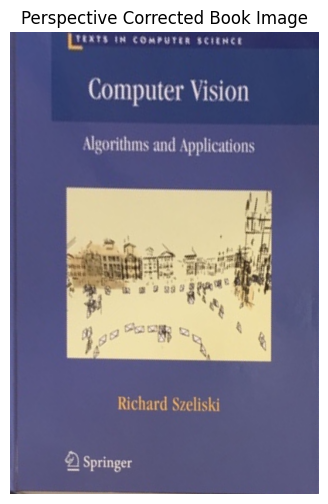

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the image
image_path = './Images/book1.jpg'

# Load the image
image = cv2.imread(image_path)

# Predefine the points in the original image (approximate the book corners)
selected_points = [(317, 262), (530, 375), (317, 668), (73, 480)]

# Define the desired points in the output image
width, height = 400, 600  # Adjust as needed
dest_points = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype=np.float32)

# Convert source points to NumPy array
src_points = np.array(selected_points, dtype=np.float32)

# Compute the homography matrix
h_matrix, _ = cv2.findHomography(src_points, dest_points)

# Warp the image using the homography matrix
corrected_image = cv2.warpPerspective(image, h_matrix, (width, height))

# Display the corrected image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title("Perspective Corrected Book Image")
plt.axis('off')
plt.show()


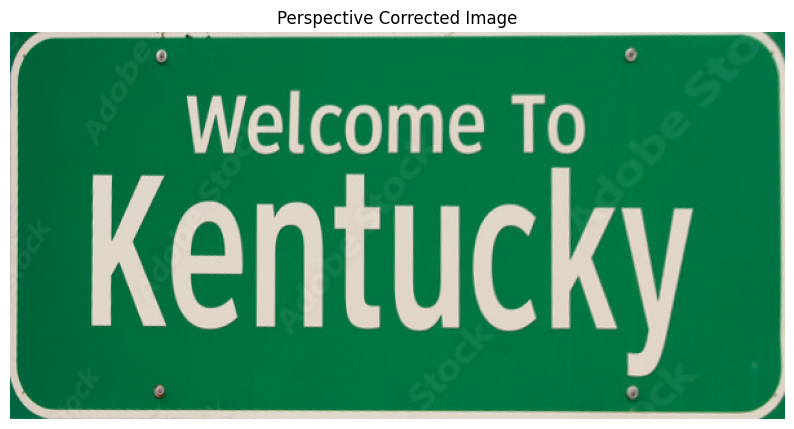

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the image
image_path = './Images/road_sign.jpeg'

# Load the image
image = cv2.imread(image_path)

# Predefine the points in the original image (approximate the book corners)
# Replace these with the approximate corners of the book in your image
selected_points = [(107, 119), (661, 270), (687, 488), (75, 431)]

# Define the desired points in the output image
width, height = 600, 300  # Adjust as needed
dest_points = np.array([[0, 0], [width-1, 0], [width-1, height-1], [0, height-1]], dtype=np.float32)

# Convert source points to NumPy array
src_points = np.array(selected_points, dtype=np.float32)

# Compute the homography matrix
h_matrix, _ = cv2.findHomography(src_points, dest_points)

# Warp the image using the homography matrix
corrected_image = cv2.warpPerspective(image, h_matrix, (width, height))

# Display the corrected image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(corrected_image, cv2.COLOR_BGR2RGB))
plt.title("Perspective Corrected Image")
plt.axis('off')
plt.show()


## Task 2 

## Virtual Advertisement

In many televised sports events, advertisement in virtually inserted in live video feed. E.g. in soccer and baseball the ads placed on small advertisement boards right outside the boundary of the field can be virtually changed. Instead of displaying the same ad to everybody, advertisers can choose which ads to show based on the person’s demographics, location etc. In these applications the four corners of the advertisement board are detected in the video which serve as the destination points. The four corners of the ad serve as the source points. A homography is calculated based on these four corresponding points and it is used to warp the ad into the video frame.

Using the same approach, apply perspective projection on the field image below to replace the LG logo with the McDonald's logo

<img src = Images/field.jpeg style="width:400px;height:200px">

<img src = Images/M.jpg style="width:400px;height:200px">

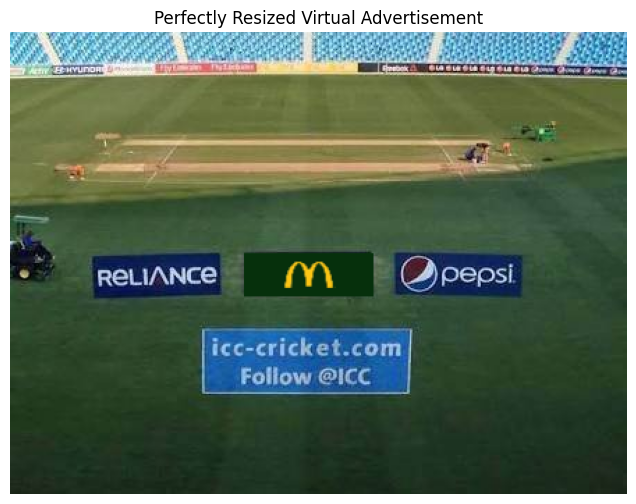

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the images
field_image_path = './Images/field.jpeg'  
logo_image_path = './Images/M.jpg'  

field_image = cv2.imread(field_image_path)
logo_image = cv2.imread(logo_image_path)

# Step 2: Define Points
# Points on the LG logo in the field image (manually approximate these)
lg_logo_points = np.array([(168, 159), (260, 159), (260, 189), (168, 189)], dtype=np.float32)

# Calculate the dimensions of the LG logo area
lg_width = int(np.linalg.norm(lg_logo_points[0] - lg_logo_points[1]))  # Distance between top-left and top-right
lg_height = int(np.linalg.norm(lg_logo_points[0] - lg_logo_points[3]))  # Distance between top-left and bottom-left

# Step 3: Resize the McDonald's logo to match the LG logo dimensions
resized_logo = cv2.resize(logo_image, (lg_width, lg_height))

# Step 4: Define points of the resized McDonald's logo
logo_points_resized = np.array([
    [0, 0],                          # Top-left
    [lg_width-1, 0],                 # Top-right
    [lg_width-1, lg_height-1],       # Bottom-right
    [0, lg_height-1]                 # Bottom-left
], dtype=np.float32)

# Step 5: Calculate the homography using the resized logo
h_matrix, _ = cv2.findHomography(logo_points_resized, lg_logo_points)

# Step 6: Warp the resized McDonald's logo to fit into the LG logo area
warped_logo = cv2.warpPerspective(resized_logo, h_matrix, (field_image.shape[1], field_image.shape[0]))

# Step 7: Blending
mask = np.zeros_like(field_image[:, :, 0], dtype=np.uint8)  # Single channel mask
cv2.fillConvexPoly(mask, lg_logo_points.astype(int), 255)

field_image_blackout = cv2.bitwise_and(field_image, field_image, mask=cv2.bitwise_not(mask))
blended_image = cv2.add(field_image_blackout, warped_logo)

# Display the final image
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(blended_image, cv2.COLOR_BGR2RGB))
plt.title("Perfectly Resized Virtual Advertisement")
plt.axis('off')
plt.show()

## Task 3 

## Panorama
## Dataset

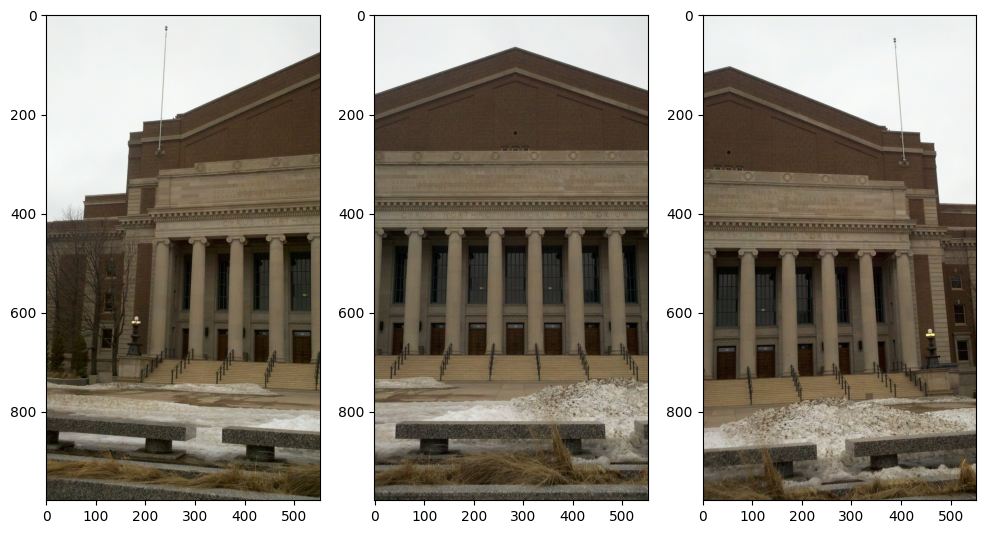

In [28]:
import cv2
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

# figure size in inches optional
rcParams['figure.figsize'] = 12 ,8

# read images
img1 = cv2.imread("Images/Panorama/mall1.jpg")
img2 = cv2.imread("Images/Panorama/mall2.jpg")
img3 = cv2.imread("Images/Panorama/mall3.jpg")

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

# display images
fig, ax = plt.subplots(1,3)
ax[0].imshow(img1)
ax[1].imshow(img2)
ax[2].imshow(img3)

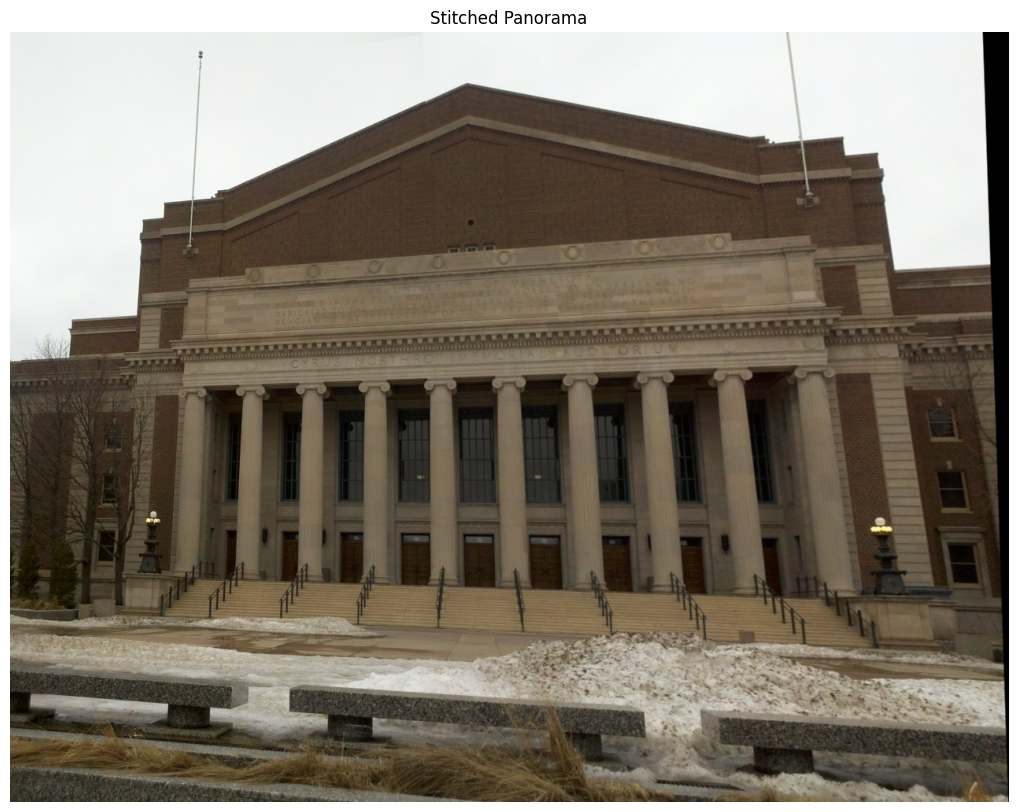

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to load and preprocess images
def load_and_preprocess_images(paths):
    images = []
    for path in paths:
        img = cv2.imread(path)
        if img is None:
            raise FileNotFoundError(f"Image not found: {path}")
        images.append(img)
    return images

# Function to detect features and compute descriptors using SIFT
def compute_keypoints_and_descriptors(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Function to match features between two images using BFMatcher and ratio test
def match_features(descriptors1, descriptors2, ratio=0.75):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    good_matches = [m for m, n in matches if m.distance < ratio * n.distance]
    return good_matches

# Function to compute homography from matched keypoints
def compute_homography(kps1, kps2, matches):
    src_pts = np.float32([kps1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
    dst_pts = np.float32([kps2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
    H, _ = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
    return H

# Function to stitch two images together
def stitch_two_images(base_image, next_image, H):
    h, w = base_image.shape[:2]
    canvas_size = (w * 2, h)  # Expand canvas for stitching
    warped_image = cv2.warpPerspective(next_image, H, canvas_size)
    warped_image[0:h, 0:w] = np.maximum(base_image, warped_image[0:h, 0:w])
    return warped_image

# Function to crop the stitched panorama
def crop_panorama(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = cv2.boundingRect(max(contours, key=cv2.contourArea))
    return image[y:y+h, x:x+w]

# Main function to stitch multiple images into a panorama
def create_panorama(image_paths):
    # Load and preprocess images
    images = load_and_preprocess_images(image_paths)

    # Convert first image to base image
    base_image = images[0]
    base_kps, base_desc = compute_keypoints_and_descriptors(base_image)

    for i in range(1, len(images)):
        next_image = images[i]
        next_kps, next_desc = compute_keypoints_and_descriptors(next_image)

        # Match features and compute homography
        matches = match_features(next_desc, base_desc)
        if len(matches) < 4:
            raise ValueError("Not enough matches to compute homography")
        H = compute_homography(next_kps, base_kps, matches)

        # Stitch the next image into the panorama
        base_image = stitch_two_images(base_image, next_image, H)

        # Update base image descriptors
        base_kps, base_desc = compute_keypoints_and_descriptors(base_image)

    # Crop the final panorama
    return crop_panorama(base_image)

# Define image paths
image_paths = ["./Images/Panorama/mall1.jpg", "./Images/Panorama/mall2.jpg", "./Images/Panorama/mall3.jpg"]

# Create panorama
stitched_panorama = create_panorama(image_paths)

# Convert BGR to RGB for visualization
stitched_panorama_rgb = cv2.cvtColor(stitched_panorama, cv2.COLOR_BGR2RGB)

# Display the final panorama
plt.figure(figsize=(16, 10))
plt.imshow(stitched_panorama_rgb)
plt.axis('off')
plt.title("Stitched Panorama")
plt.show()


## Perform image stitching and create a panorama of stitched images. Here are some basic steps you need to perform for image stiching:

    1. Detecting keypoints (DoG, Harris, etc.) and extracting local invariant descriptors (SIFT, SURF, ORB etc.) from two input images, you may use library implementation of SIFT/SURF/ORB
    2. Matching the descriptors between the images
    3. Estimate a homography matrix using our matched feature vectors, you may use library implementation for homography.
    4. Applying a warping transformation using the homography matrix obtained from Step #3
    
You should apply the above steps one by one and create the panorama. You shouldn't use opencv Stitcher module to create the panorama directly in 1 line.

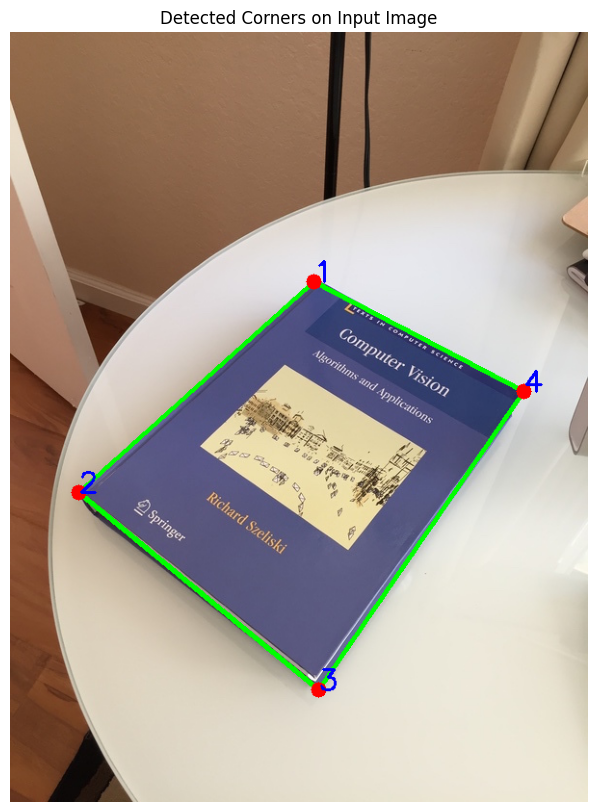

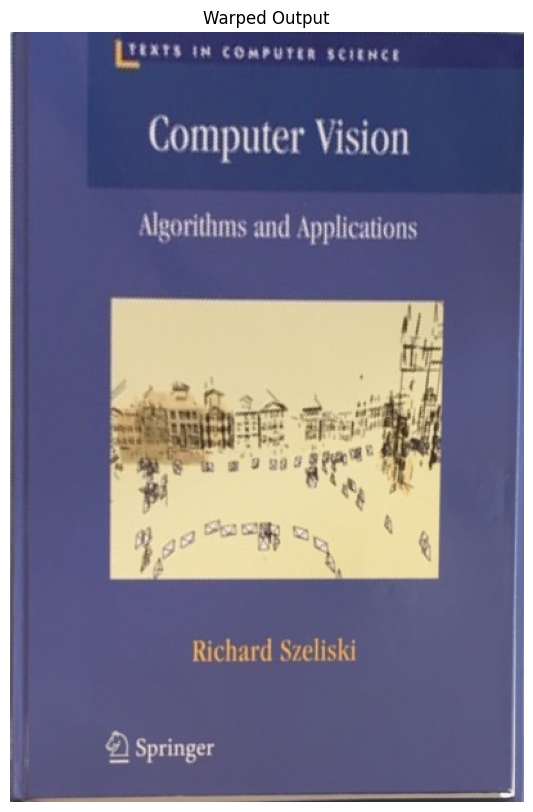

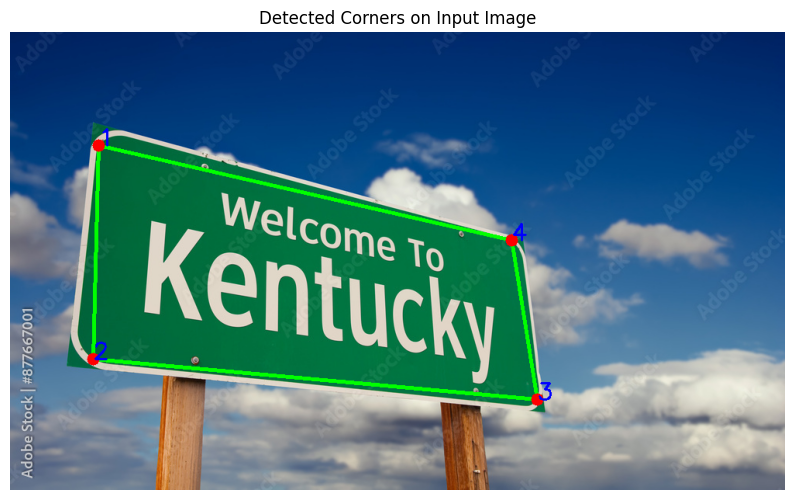

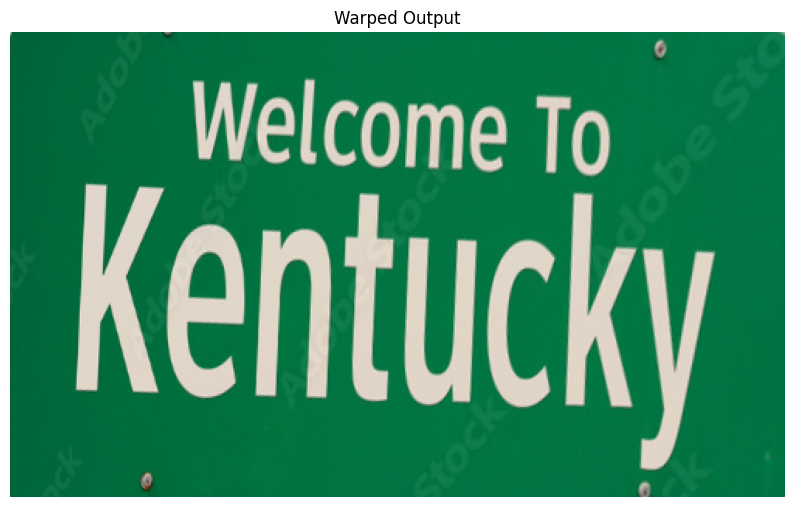

In [30]:
## Auto Detection of corners for task 1

import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path):
    """Loads an image from the specified path."""
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image at path '{image_path}' not found.")
    return image


def detect_corners(image):
    """
    Detects the four corners of a book or quadrilateral object in the image.
    
    Parameters:
        image: The input image.
    
    Returns:
        corners: Detected corners as a numpy array.
        processed_image: Image with corners visualized.
    """
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to smooth the image
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Apply Canny edge detection
    edges = cv2.Canny(blurred_image, threshold1=50, threshold2=150)

    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sort contours by area in descending order and take the largest one
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    book_contour = contours[0]

    # Approximate the contour to a polygon
    epsilon = 0.02 * cv2.arcLength(book_contour, True)
    approx_corners = cv2.approxPolyDP(book_contour, epsilon, True)

    # Ensure the approximation has exactly 4 corners
    if len(approx_corners) != 4:
        raise ValueError("Failed to detect 4 corners. Check the image or adjust parameters.")

    # Reshape the corners for easier use
    corners = approx_corners.reshape(-1, 2)

    # Visualize the detected corners
    processed_image = cv2.drawContours(image.copy(), [approx_corners], -1, (0, 255, 0), 3)
    for i, corner in enumerate(corners):
        cv2.circle(processed_image, tuple(corner), 8, (0, 0, 255), -1)
        cv2.putText(processed_image, f"{i+1}", tuple(corner), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

    return corners, processed_image


def apply_perspective_transform(image, src_points, output_width, output_height):
    """
    Applies a perspective transformation to the image based on source points.

    Parameters:
        image: The input image.
        src_points: Source points (corners) as a numpy array.
        output_width: Desired width of the output image.
        output_height: Desired height of the output image.

    Returns:
        warped_image: The perspective-transformed image.
    """
    # Define destination points for the rectangle
    dst_points = np.array([
        [0, 0],                          # Top-left
        [0, output_height],              # Bottom-left
        [output_width, output_height],   # Bottom-right
        [output_width, 0]                # Top-right
    ], dtype=np.float32)

    # Map the source (corners) to destination (rectangle)
    perspective_matrix = cv2.getPerspectiveTransform(src_points.astype(np.float32), dst_points)

    # Print perspective matrix for debugging
    #print("Perspective Matrix:\n", perspective_matrix)

    # Apply perspective warp
    warped_image = cv2.warpPerspective(image, perspective_matrix, (output_width, output_height))

    return warped_image


def visualize(image, title="Image"):
    """Displays an image using Matplotlib."""
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()


def process_image(image_path, output_width, output_height):
    """
    Processes an image by detecting corners and applying a perspective transform.
    
    Parameters:
        image_path: Path to the input image.
        output_width: Desired width of the output image.
        output_height: Desired height of the output image.
    """
    # Load the image
    image = load_image(image_path)

    # Detect corners
    corners, processed_image = detect_corners(image)

    # Display the detected corners for confirmation
    #print("Source Points (Corners):\n", corners)
    visualize(processed_image, title="Detected Corners on Input Image")

    # Apply perspective transform
    warped_image = apply_perspective_transform(image, corners, output_width, output_height)

    # Display the warped image
    visualize(warped_image, title="Warped Output")


# Process the first image
process_image('./Images/book1.jpg', output_width=400, output_height=600)

# Process the second image
process_image('./Images/road_sign.jpeg', output_width=500, output_height=300)
